In [2]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../Dados/Starbucks_satisfactory_survey_encode_cleaned.csv')
print('O dataset é composto por %d linhas e %d colunas'%df.shape)

O dataset é composto por 113 linhas e 33 colunas


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Id                      113 non-null    int64
 1   gender                  113 non-null    int64
 2   age                     113 non-null    int64
 3   status                  113 non-null    int64
 4   income                  113 non-null    int64
 5   visitNo                 113 non-null    int64
 6   method                  113 non-null    int64
 7   timeSpend               113 non-null    int64
 8   location                113 non-null    int64
 9   membershipCard          113 non-null    int64
 10  itemPurchaseCoffee      113 non-null    int64
 11  itempurchaseCold        113 non-null    int64
 12  itemPurchasePastries    113 non-null    int64
 13  itemPurchaseJuices      113 non-null    int64
 14  itemPurchaseSandwiches  113 non-null    int64
 15  itemPurchaseOthers     

In [5]:
# Renomeando as colunas.

df.rename(columns = {'Id':'id', 'gender':'genero', 'age':'faixa_etaria', 'status':'ocupacao_atual',
                     'income':'renda_anual', 'visitNo':'freq_visita', 'method':'modalidade',
                     'timeSpend':'tempo_visita', 'location':'dist_loja', 'membershipCard':'cartao_membro', 
                     'itemPurchaseCoffee':'compra_cafe', 'itempurchaseCold':'compra_gelada', 'itemPurchasePastries':'compra_doces',
                     'itemPurchaseJuices':'compra_sucos','itemPurchaseSandwiches':'compra_sanduiches', 'itemPurchaseOthers':'compra_outros',
                     'spendPurchase':'gasto_p_visita', 'productRate':'av_produto', 'priceRate':'av_preco', 'promoRate':'av_promocao',
                     'ambianceRate':'av_ambiente', 'wifiRate':'av_wifi', 'serviceRate':'av_servicos', 'chooseRate':'prob_escolha',
                     'promoMethodApp':'veic_promo_App', 'promoMethodSoc':'veic_promo_MSocial', 'promoMethodEmail':'veic_promo_Email',
                     'promoMethodDeal':'veic_promo_Siteof', 'promoMethodFriend':'veic_promo_Amigos','promoMethodDisplay':'veic_promo_Display',
                     'promoMethodBillboard':'veic_promo_Billboard', 'promoMethodOthers':'veic_promo_Outros',
                     'loyal':'fidelizacao'}, inplace = True)

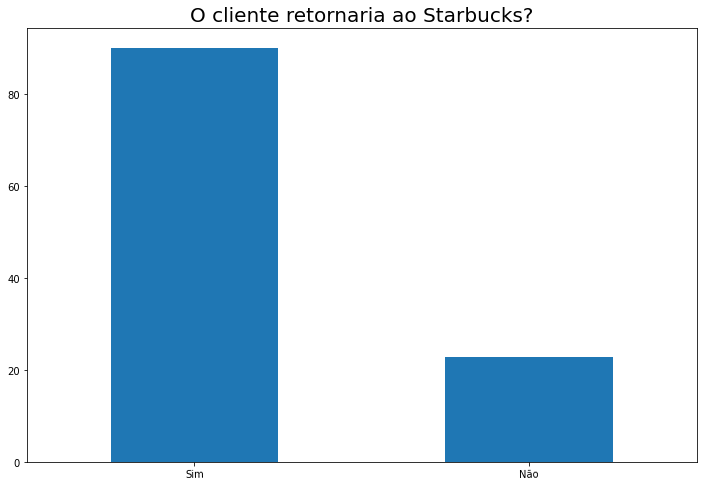

In [6]:
# Visualizando a distribuição de clientes que foram ou não fidelizados.
dist = df['fidelizacao'].value_counts()
ax = dist.plot.bar(rot = 1)
ax.figure.set_size_inches(12,8)
ax.set_title('O cliente retornaria ao Starbucks?', fontsize = 20)
ax.set_xticklabels(['Sim', 'Não'])
ax = ax

Como pode-se notar a grande maioria de clientes que responderam o questionário disseram que retornariam ao Starbucks.

Agora é necessário realizar um estudo exploratório destes dados buscando encontrar quais aspectos estão impactando nesta decisão de retornar ou não.

# Análise exploratória dos dados

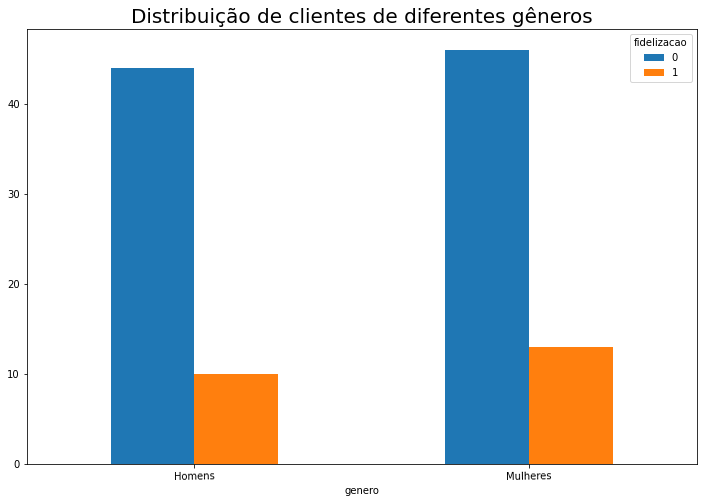

In [7]:
# tabela dupla para as variáveis gênero e fidelização
tabela_dupla = pd.crosstab(index = df['genero'], columns = df['fidelizacao'])
tabela_dupla

# Plotar a tabela dupla
ax = tabela_dupla.plot.bar(rot = 1, figsize = (12,8))
ax.set_title('Distribuição de clientes de diferentes gêneros', fontsize = 20)
ax.set_xticklabels(['Homens', 'Mulheres'])
ax = ax

>Não parece existir uma diferença significativa nas respostas dos clientes do gênero masculino e feminino

In [8]:
def roda_tabela_dupla(index, titulo, xtick):
    tabela_dupla = pd.crosstab(index = df[index], columns = df['fidelizacao'])
    tabela_dupla

    # Plotar a tabela dupla
    ax = tabela_dupla.plot.bar(rot = 1, figsize = (12,8))
    ax.set_title(titulo, fontsize = 20)
    ax.set_xticklabels(xtick)
    ax = ax

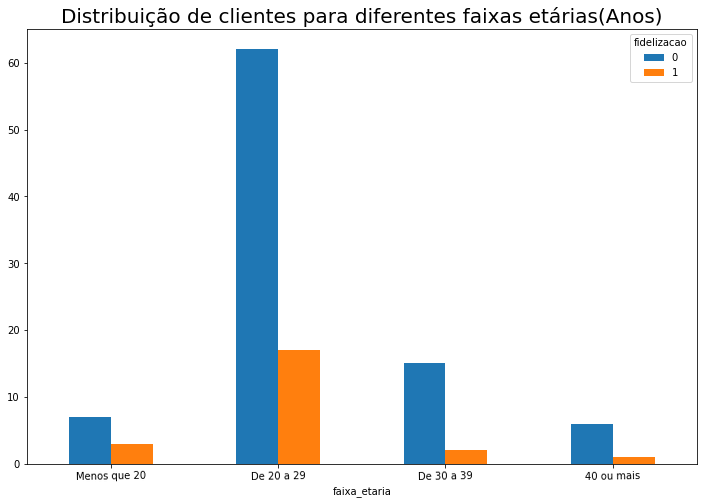

In [9]:
roda_tabela_dupla('faixa_etaria','Distribuição de clientes para diferentes faixas etárias(Anos)', ['Menos que 20', 'De 20 a 29', 'De 30 a 39', '40 ou mais'])

> A faixa etária predominante nesta amostra é de clientes com idade entre 20 e 29 anos.

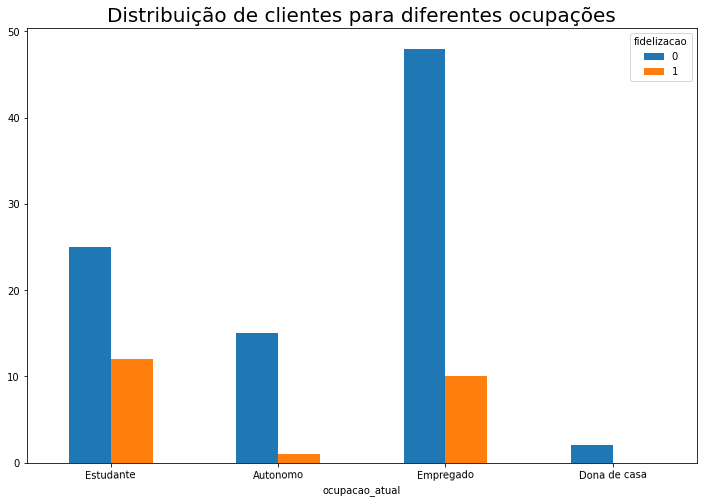

In [10]:
roda_tabela_dupla('ocupacao_atual', 'Distribuição de clientes para diferentes ocupações', ['Estudante', 'Autonomo','Empregado', 'Dona de casa'])

>Neste gráfico podemos observar que no grupo de estudantes, a diferença entre os clientes que afirmam que retornariam ou não é menor que nos demais grupois.

>Além disso a classe com mais respostas é a dos empregados. 

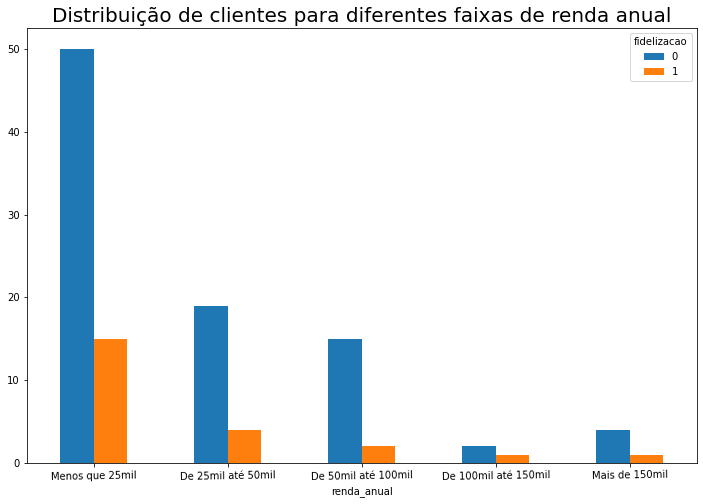

In [11]:
roda_tabela_dupla('renda_anual','Distribuição de clientes para diferentes faixas de renda anual',['Menos que 25mil', 'De 25mil até 50mil','De 50mil até 100mil','De 100mil até 150mil','Mais de 150mil'])

> A maioria dos clientes recebe anualmente menos de 25 mil (RM).  

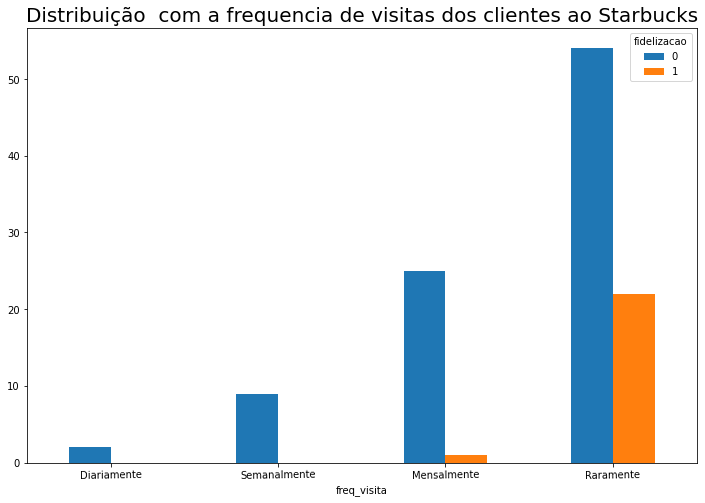

In [12]:
roda_tabela_dupla('freq_visita','Distribuição  com a frequencia de visitas dos clientes ao Starbucks', ['Diariamente','Semanalmente','Mensalmente','Raramente'])

> Aqui é possível notar que a maioria dos respondentes não tem o costume de visitar o Starbucks e vão lá poucas vezes(Raramente)

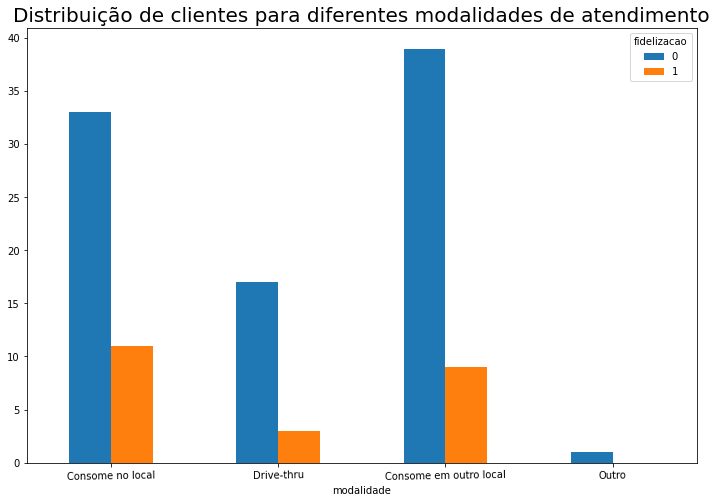

In [13]:
roda_tabela_dupla('modalidade','Distribuição de clientes para diferentes modalidades de atendimento',['Consome no local','Drive-thru','Consome em outro local','Outro' ])

> A maioria dos respondentes prefere consumir no próprio estabelecimento ou opta por comprar e consumir em outro local.

> A diferença entre os clientes que afirmam voltar ou não, na classe que respondeu escolher consumir no local, é um pouco menor quando comparada com as demais.

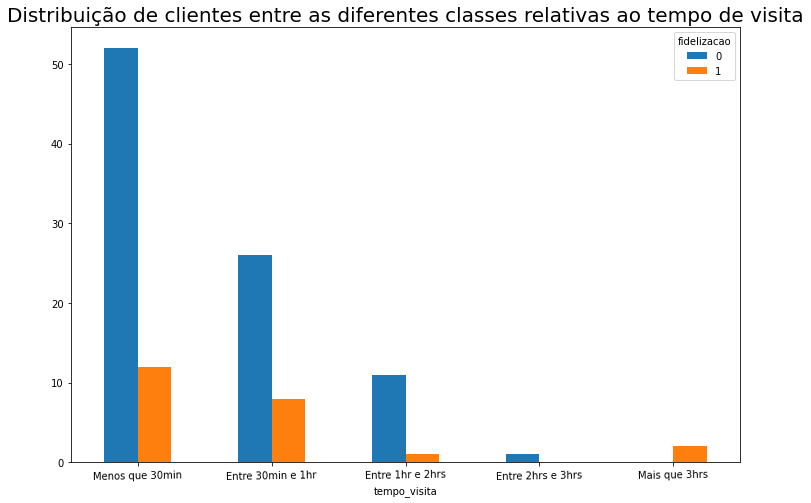

In [14]:
roda_tabela_dupla('tempo_visita','Distribuição de clientes entre as diferentes classes relativas ao tempo de visita',['Menos que 30min','Entre 30min e 1hr','Entre 1hr e 2hrs','Entre 2hrs e 3hrs','Mais que 3hrs'])

> A maioria dos clientes gasta menos de 30 minutos na cafeteria e pouquissimas pessoas passam mais de 2 horas

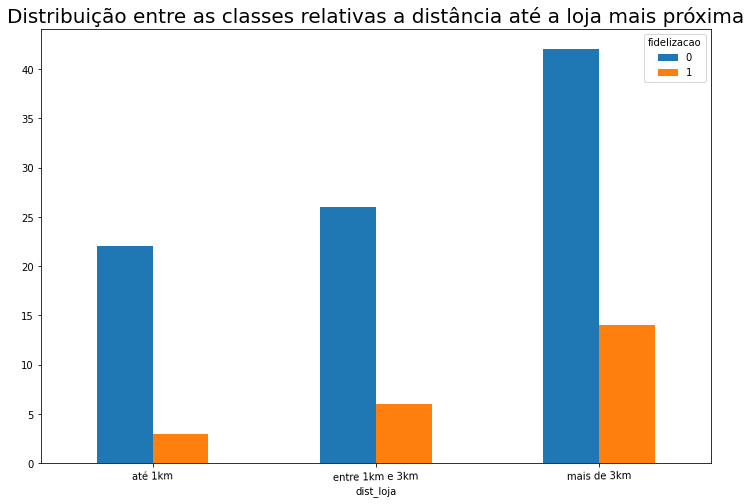

In [15]:
roda_tabela_dupla('dist_loja', 'Distribuição entre as classes relativas a distância até a loja mais próxima',['até 1km','entre 1km e 3km','mais de 3km'])

> As lojas mais proxima ficam a mais de 3km de distância da maioria dos clientes.

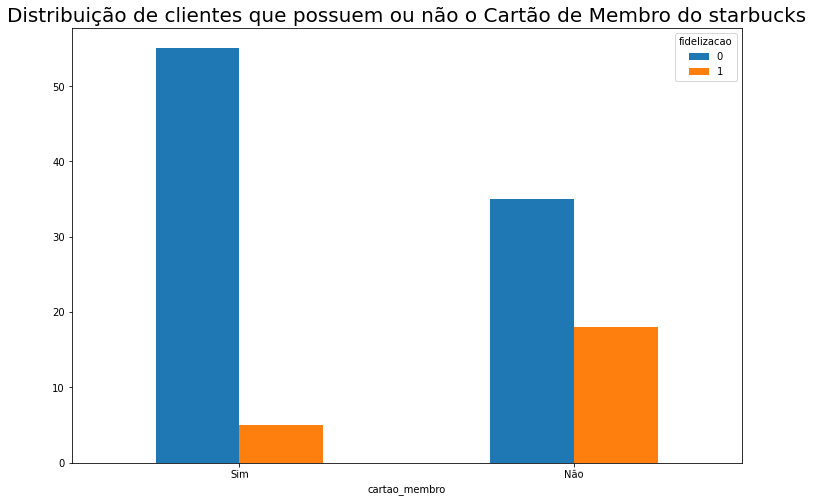

In [16]:
roda_tabela_dupla('cartao_membro','Distribuição de clientes que possuem ou não o Cartão de Membro do starbucks',['Sim','Não'])

> Aparentemente, pessoas que não possuem o Cartão de membro tem uma tendencia maior de não retornar ao Starbucks

In [17]:
df.columns

Index(['id', 'genero', 'faixa_etaria', 'ocupacao_atual', 'renda_anual',
       'freq_visita', 'modalidade', 'tempo_visita', 'dist_loja',
       'cartao_membro', 'compra_cafe', 'compra_gelada', 'compra_doces',
       'compra_sucos', 'compra_sanduiches', 'compra_outros', 'gasto_p_visita',
       'av_produto', 'av_preco', 'av_promocao', 'av_ambiente', 'av_wifi',
       'av_servicos', 'prob_escolha', 'veic_promo_App', 'veic_promo_MSocial',
       'veic_promo_Email', 'veic_promo_Siteof', 'veic_promo_Amigos',
       'veic_promo_Display', 'veic_promo_Billboard', 'veic_promo_Outros',
       'fidelizacao'],
      dtype='object')

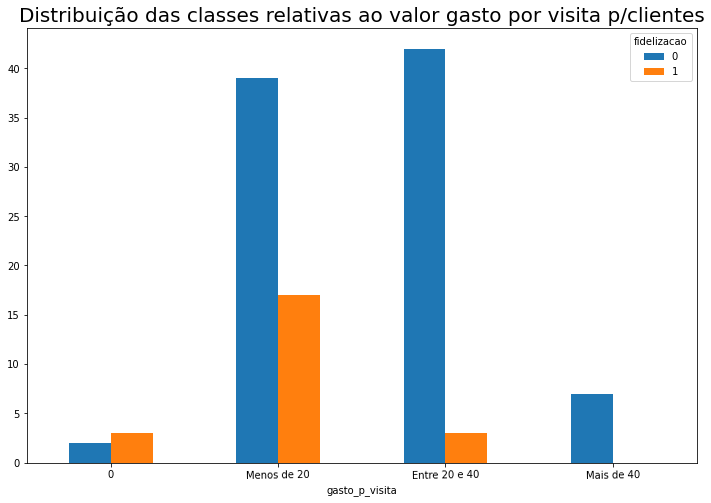

In [18]:
roda_tabela_dupla('gasto_p_visita','Distribuição das classes relativas ao valor gasto por visita p/clientes',['0','Menos de 20','Entre 20 e 40','Mais de 40'])

> Os clientes que gastam menos de 20 RM apresentam um maior número de clientes que decidiram não retorar a cafeteria.

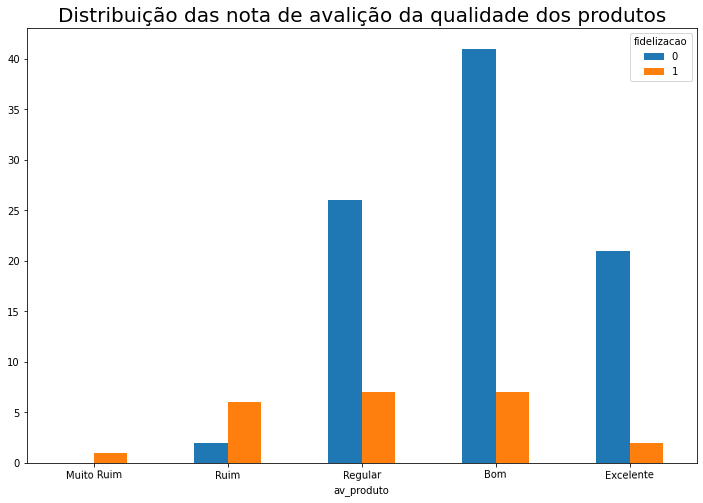

In [19]:
roda_tabela_dupla('av_produto','Distribuição das nota de avalição da qualidade dos produtos',['Muito Ruim','Ruim','Regular','Bom','Excelente'])

> Aqueles que classificaram como **Ruim** ou **Muito Ruim** possuem como grupo maioritário os clientes que afirmam não retornar ao Starbucks.

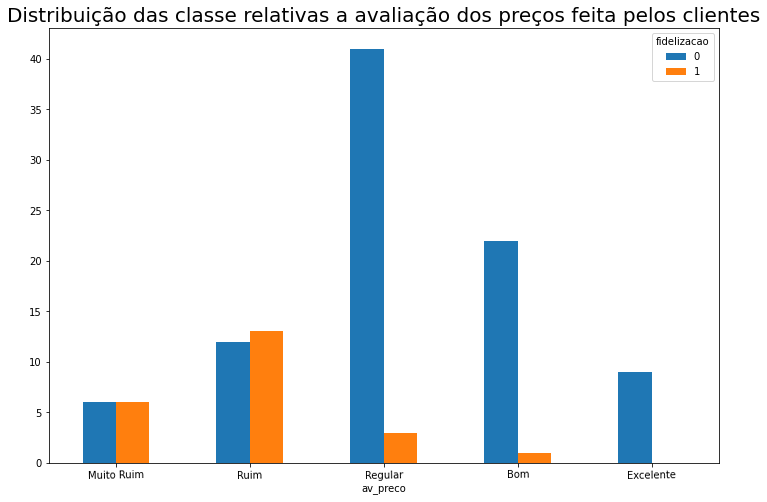

In [20]:
roda_tabela_dupla('av_preco','Distribuição das classe relativas a avaliação dos preços feita pelos clientes',['Muito Ruim','Ruim','Regular','Bom','Excelente'])

> O **preço percebido** pelos clientes é um **fator importante na decisão** de retornar ou não. Aqueles que avaliaram os valores como ruins ou muito ruins tem a maior parcela de clientes que responderam não retornar a cafeteria 

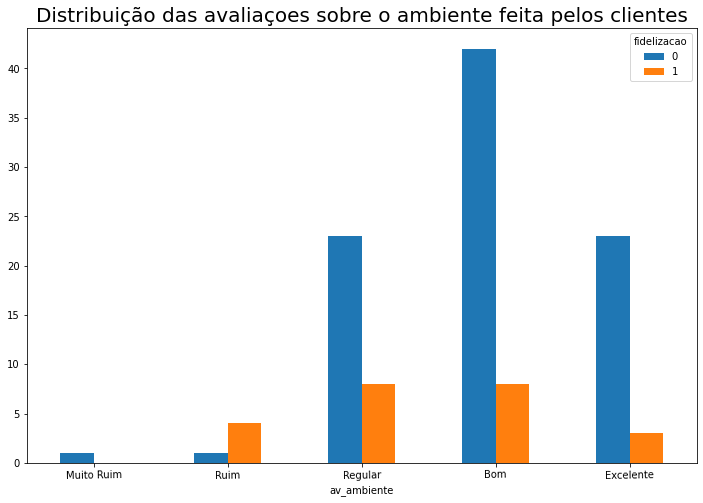

In [21]:
roda_tabela_dupla('av_ambiente','Distribuição das avaliaçoes sobre o ambiente feita pelos clientes',['Muito Ruim','Ruim','Regular','Bom','Excelente'])

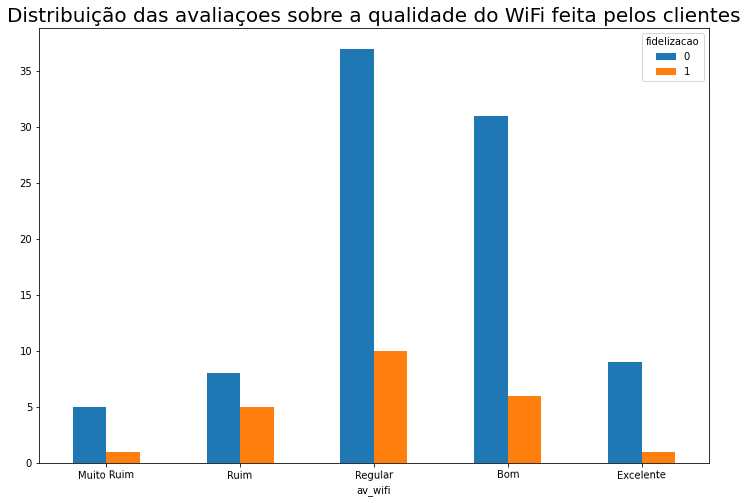

In [22]:
roda_tabela_dupla('av_wifi','Distribuição das avaliaçoes sobre a qualidade do WiFi feita pelos clientes',['Muito Ruim','Ruim','Regular','Bom','Excelente'])

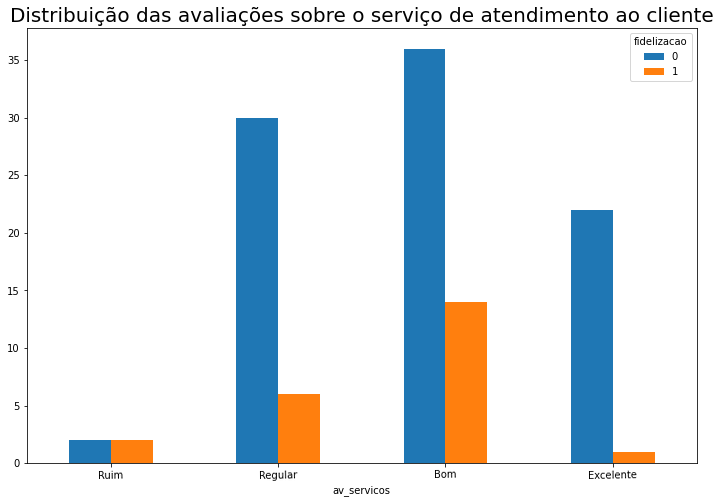

In [25]:
roda_tabela_dupla('av_servicos','Distribuição das avaliações sobre o serviço de atendimento ao cliente',['Ruim','Regular','Bom','Excelente'])

> A maior parte do clientes classificou o serviço de atendimento ao cliente como sendo Regular ou Bom, no entanto, no grupo que classificou como Bom existe uma a concentração maior de clientes que responderam não retornar.

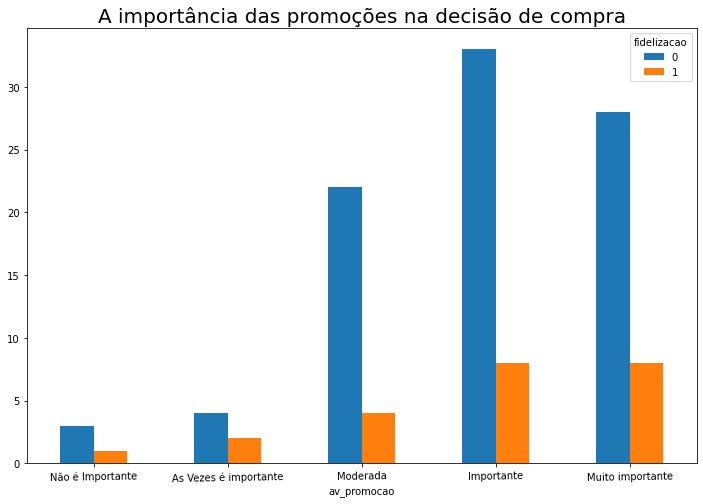

In [26]:
roda_tabela_dupla('av_promocao','A importância das promoções na decisão de compra',['Não é Importante','As Vezes é importante','Moderada','Importante','Muito importante'])

> A maioria dos clientes considera as promoções como um fator importante ou muito importante na decisão de compra.

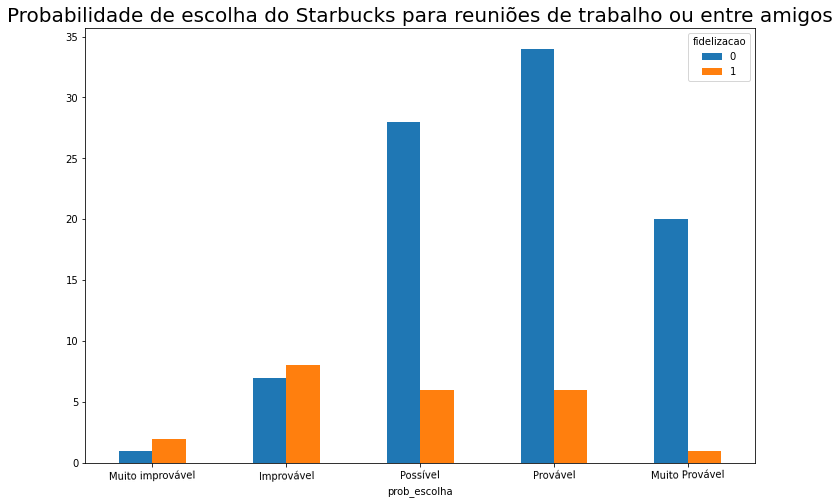

In [28]:
roda_tabela_dupla('prob_escolha','Probabilidade de escolha do Starbucks para reuniões de trabalho ou entre amigos',['Muito improvável','Improvável','Possível','Provável','Muito Provável'])

> A  classe de  clientes que afirmam não retornar é a predominatente dentre aqueles que disseram ser **Improvável** ou **Muito improvável**.

> A **maior parte dos clientes** vê o Starbucks como um local que pode ser utilizado para reuniões de trabalho ou entre amigos.

## Conclusão da Análise exploratória.

Neste conjunto de dados pode-se observar que **a maioria dos clientes que participaram desta pesquisa** responderam que **retornariam ao Starbucks**. Além disso, pode-se evidenciar que:

1- A maioria deles declarou possuir um emprego fixo;

2- A faixa etária entre 20 e 29 anos;

3- Possuem uma renda anual média menor que 25 mil Ringgit malaios;

4- Costumam permanecer na cafeteria por menos de uma hora;

5- Costumam gastar menos que 40 RM por visita.

Outros pontos que chamaram atenção foi que a maioria dos clientes afirmou ir aos estabelecimentos raramente, o que nos mostra que eles vão lá poucas vezes. Isso pode estar ligado a outro ponto abordado na pesquisa, distância até a loja mais próxima, visto que uma parcela considerável respondeu que a loja mais próxima fica a mais de 3 quilômetros de distância.

Sobre as avaliações de produto, preço, ambiente, Wifi , serviço,  e promoção. Acredito que seja possível afirmar que dentre todos os aspectos avaliados, **a percepção do preço tem uma importância maior**, visto que aqueles clientes que percebem o preço como sendo ruim ou muito ruim apresentam uma maior parcela do grupo não fidelizado.

Diante disso e com base nas análises realizadas:

1- Creio que seria importante realizar uma campanha visando aumentar o número de pessoas que possuem o cartão de membro;

2- Desenvolver um plano de expansão da franquia buscando reduzir essa distância até a loja mais próxima.

3- Desenvolver estratégias para melhorar os aspectos relativos ao preço percebido pelos clientes.

4- Continuar com os investimentos em promoção, pois foi classificado como uma fator importante no processo decisório de compra.